### In this Jupyter Notebook we will explore the various relationships in Google Playstore dataset
### using numpy, pandas, seaborn, matlibplot and more.

In [319]:
# import relavent packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load in the csv file with pd.read_csv()

In [320]:
google = pd.read_csv("googleplaystore.csv")
google_user = pd.read_csv("googleplaystore_user_reviews.csv")


Inspect the data with pd.head()

In [321]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [322]:
google_user.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Use pd.info() to inspect data types as non-null counts 

In [323]:
google.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [324]:
google_user.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Checking the missing data which can help to make a decision on how to deal with them.

In [325]:
google.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

Select 20 random rows with missing data to inspect

In [326]:
google[google.isnull().any(axis=1)].sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7339,"Reading Race 1b: sh, ch words",FAMILY,NaN,2,76M,50+,Paid,$3.99,Everyone,Educational;Education,"January 8, 2016",1.01,4.0 and up
6240,Lexus Tech BH Service Pro,LIFESTYLE,NaN,0,904k,10+,Free,0,Teen,Lifestyle,"July 26, 2016",5.0,3.0 and up
9097,DZ Mobile Market,SHOPPING,NaN,59,6.0M,"10,000+",Free,0,Everyone,Shopping,"February 1, 2018",1.0.3-DzMobile,4.0.3 and up
8356,EVENTOS DF,EVENTS,NaN,0,4.5M,10+,Free,0,Everyone,Events,"December 1, 2017",1.0.1,4.1 and up
8112,VAT check CY,BUSINESS,NaN,0,642k,100+,Free,0,Everyone,Business,"May 18, 2013",1.0.16,1.6 and up
6956,QR & Barcode Scanner BX PRO,TOOLS,NaN,4,3.0M,"1,000+",Free,0,Everyone,Tools,"October 30, 2017",1.0,4.2 and up
9458,Painel EJ SSH - INTERNET GRÁTIS,TOOLS,NaN,10,13M,50+,Free,0,Everyone,Tools,"July 30, 2018",5.1,4.1 and up
5170,Sherbourne AH,MEDICAL,NaN,1,29M,50+,Free,0,Everyone,Medical,"February 27, 2018",300000.0.98,4.0.3 and up
8612,DN Snacks,BUSINESS,NaN,0,7.6M,1+,Free,0,Everyone,Business,"April 9, 2018",1.0.0,4.0 and up
8939,DV-4036 by Somikon,PHOTOGRAPHY,NaN,17,44M,"1,000+",Free,0,Everyone,Photography,"January 19, 2017",0.0.5,4.3 and up


Upon inspection columns contain null values are: "Current Ver", "Android Ver", "Content Rating", "Type" and "Rating"
Out of above columns "Current Ver", "Android Ver", "Content Rating" and "Type" have few rows with missing value therefore we can safely drop
the corresponding row without impacting the end result. 
However vast majority of the missing data are in the "Rating" column so by simply dropping the missing row will affect the end result 
not to mention the potential relationship between "Rating" and other variables. 

In [327]:
# drop all rows contains missing value except for NaN in "Rating" column
google = google.dropna(subset=["Type", "Current Ver", "Android Ver", "Content Rating"])
print(google.isnull().sum())

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


Exploring the viability of imputing the missing "Rating" values through "Category" means

In [328]:
google.groupby("Category")["Rating"].mean(numeric_only=True)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

Above shows there is a small but significant variance between each "Category" so Impute missing values in "Rating" by "Category" averages
seems to be more accurate than just using the overall average.

In [329]:
# google.groupby("Category")["Rating"].transform("mean") will form a Series containing mean for each category in the shape as the google
# then google["Rating"].fillna() fill in the NaN with the corresponding mean value
google["Rating"] = google["Rating"].fillna(google.groupby("Category")["Rating"].transform("mean"))
google["Rating"] = google["Rating"].round(2)
google.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10572,FL Lottery Results,FAMILY,4.6,1481,3.1M,"50,000+",Free,0,Teen,Entertainment,"March 31, 2018",3.7,4.1 and up
3659,AEMET's time,WEATHER,3.8,15966,9.2M,"1,000,000+",Free,0,Everyone,Weather,"July 17, 2017",2.0,2.3 and up
4415,Cook 'n Learn Smart Kitchen,FAMILY,3.5,205,62M,"50,000+",Free,0,Everyone,Educational;Education,"March 6, 2017",1.0.4,4.3 and up
6501,NOOK Audiobooks,BOOKS_AND_REFERENCE,3.5,2539,8.6M,"500,000+",Free,0,Everyone,Books & Reference,"July 26, 2018",v1.1.6,4.1 and up
4006,C by GE,LIFESTYLE,1.7,686,6.6M,"10,000+",Free,0,Everyone,Lifestyle,"July 11, 2018",4.1.07,4.3 and up


In [330]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Now we need change the data type to a more suitable format such as "Reviews" having dtype of "object" instead of "int".

In [331]:
# "Reviews" to int type
google["Reviews"] = google["Reviews"].astype("int")
# remove "$" from "Price" and set it as float type
google["Price"] = google["Price"].str.replace("$", "").astype("float")
# set "Last Update" as datetime
google["Last Updated"] = pd.to_datetime(google["Last Updated"])
# remove "+" and "," from "Installs" and set it as int type
google["Installs"] = google["Installs"].str.replace("[+,]", "", regex=True).astype(int)
google.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7070,bz Basel News,NEWS_AND_MAGAZINES,2.20,23,33M,1000,Free,0.0,Everyone,News & Magazines,2018-06-06,1.4.0,5.0 and up
5960,BC Connect,FAMILY,3.80,11,17M,1000,Free,0.0,Everyone,Education,2018-03-14,2.6.12,4.1 and up
628,Video chat live advices,DATING,3.97,0,8.0M,100,Free,0.0,Everyone,Dating,2018-07-10,1.0,3.0 and up
1047,Endurance Lifestyle,EVENTS,4.60,7,3.8M,500,Free,0.0,Teen,Events,2017-07-10,2.1,4.2 and up
6716,Bullshit! (Free),GAME,2.40,45,4.1M,10000,Free,0.0,Teen,Card,2016-08-26,1.1,4.1 and up
9719,EP Cook Book,MEDICAL,4.19,0,3.2M,0,Paid,200.0,Everyone,Medical,2015-07-26,1.0,3.0 and up
2481,Training course: Learn Nursing,MEDICAL,4.19,0,7.0M,100,Free,0.0,Everyone,Medical,2018-07-08,1.0.0,4.1 and up
1927,Earn to Die 2,GAME,4.60,1327265,99M,50000000,Free,0.0,Teen,Racing,2017-04-12,1.3,2.3.3 and up
9814,Advanced calculator fx 991 es plus & 991 ms plus,FAMILY,4.70,7252,9.2M,500000,Free,0.0,Everyone,Education,2018-08-02,3.3.1-build-02-08-2018-19-release,4.0 and up
7686,IV Calc CP Calculator Toolkit,TOOLS,4.20,242,3.2M,10000,Free,0.0,Everyone,Tools,2016-10-06,1.3,4.2 and up


Now to check for duplicate

In [332]:
pd.value_counts(google.duplicated())

False    10346
True       483
Name: count, dtype: int64

Remove duplicates

In [333]:
google.drop_duplicates(inplace=True)
pd.value_counts(google.duplicated())

False    10346
Name: count, dtype: int64

Now to clean google_user dataset

In [334]:
#remove duplicates
google_user.drop_duplicates(inplace=True)

#remove missing values since they cannot be meaningfully imputed
google_user.dropna(inplace=True)

google_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


Summary statistics for google

In [335]:
google.describe()

,Rating,Reviews,Installs,Price,Last Updated
count,10346.000000,1.034600e+04,1.034600e+04,10346.000000,10346
mean,4.187172,4.063338e+05,1.417266e+07,1.031561,2017-11-14 14:51:45.200077312
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.050000,3.200000e+01,1.000000e+03,0.000000,2017-09-04 06:00:00
50%,4.260000,1.688500e+03,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.659825e+04,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.485385,2.698179e+06,8.028090e+07,16.287252,NaN


Below is a heatmap showing correlation between all the numerical variables

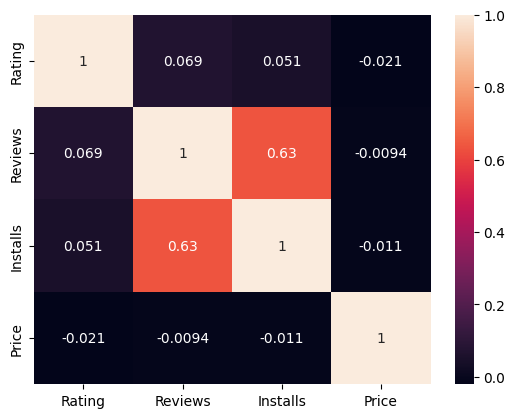

In [336]:
sns.heatmap(google.corr(method="pearson", numeric_only=True), annot=True)
plt.show()


Interesting observation that "Reviews" and "Installs" have correlation of 0.63.
We shall investigate further.

c:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



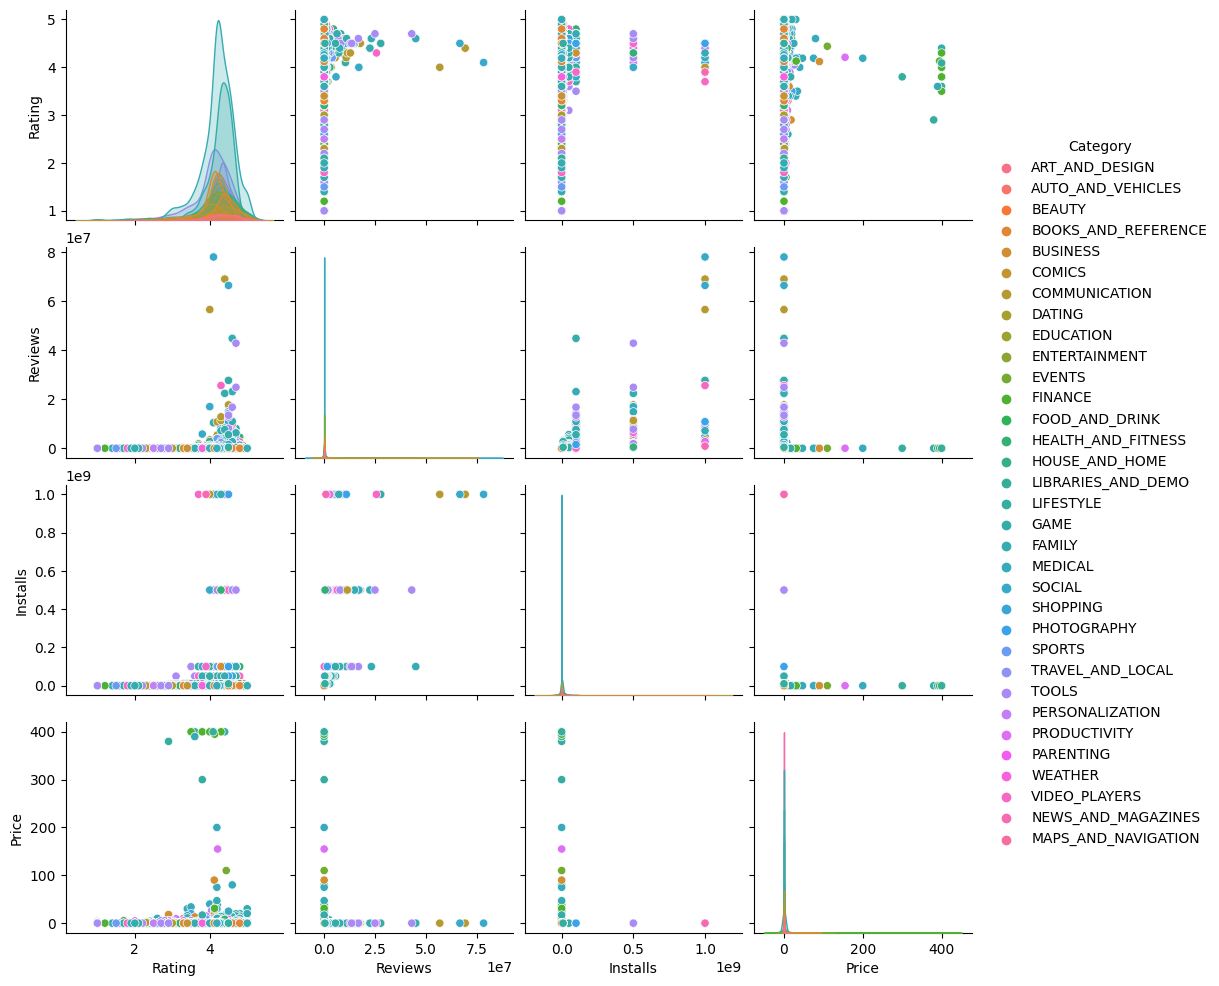

In [337]:
# Pairplot to explore relationships between variables
sns.pairplot(google, hue="Category")
plt.show()

Pair plot can be useful to glean general info about a datase but for graph such as "Reviews" vs "Installs" we need change the scale so it can become more meaningful

c:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



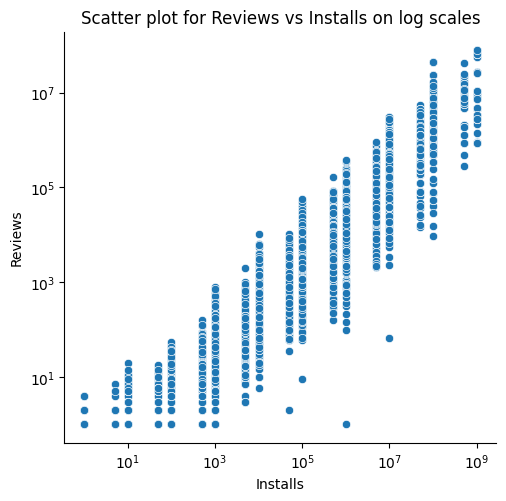

In [338]:
ax = sns.relplot(y=google["Reviews"], x=google["Installs"])
plt.title("Scatter plot for Reviews vs Installs on log scales")
plt.xscale("log")
plt.yscale("log")

Text(0.5, 1.0, 'Distribution of Rating')

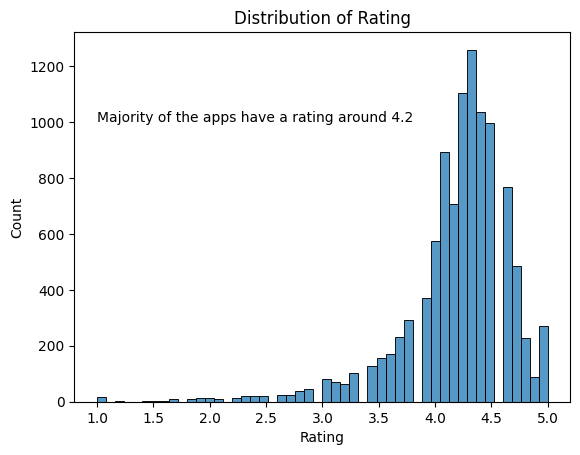

In [339]:
ax = sns.histplot(google["Rating"], bins=50)
ax.text(1, 1000, "Majority of the apps have a rating around 4.2")
plt.title("Distribution of Rating")

Below is a horizontal countplot showing number of apps per category

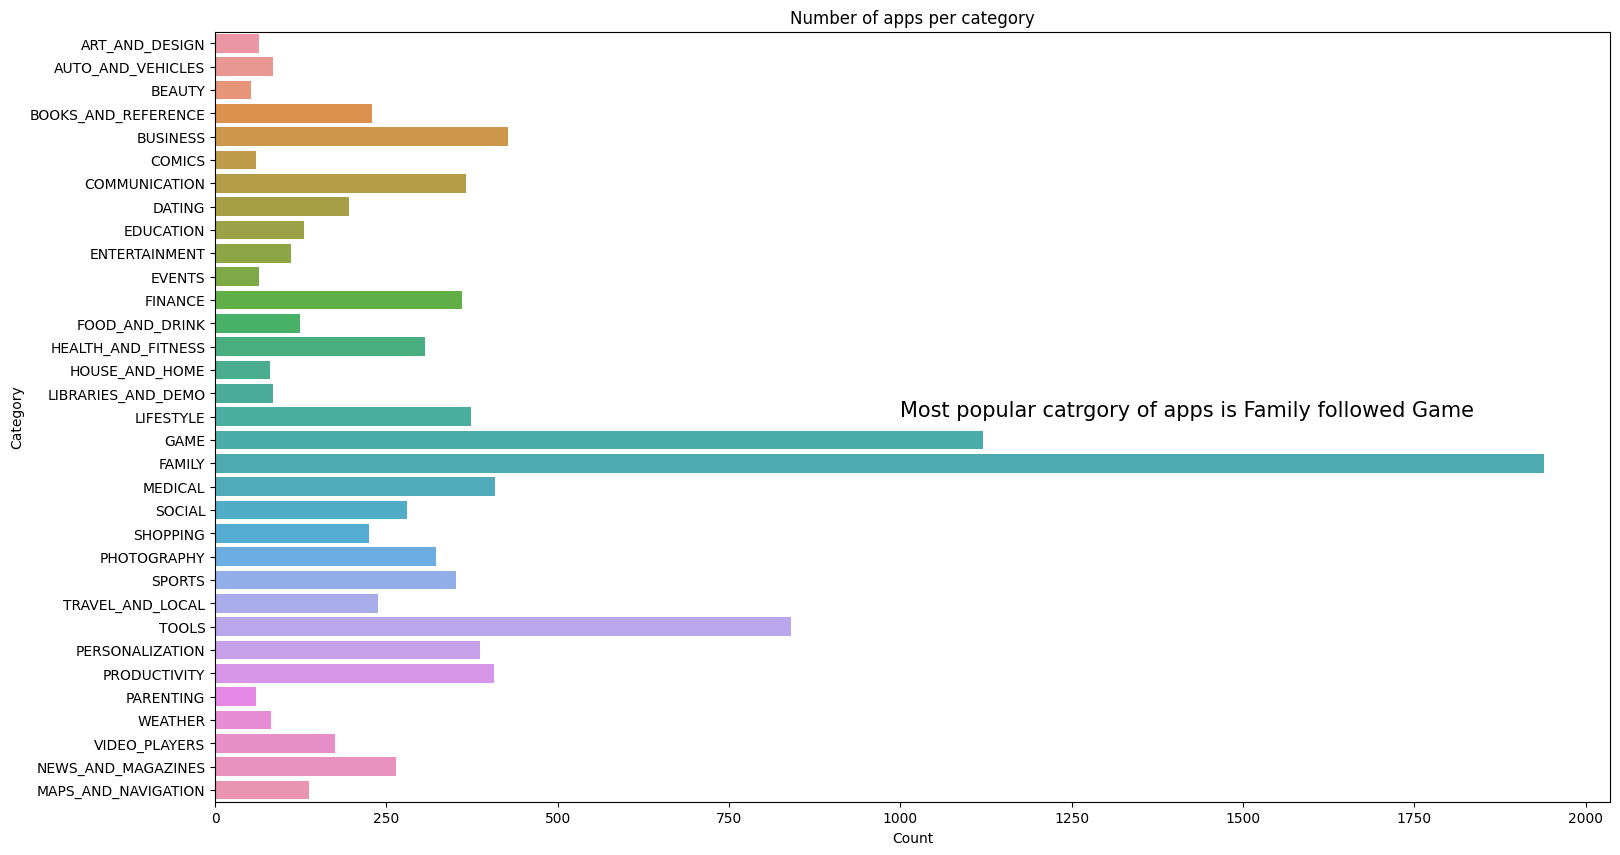

In [340]:
plt.figure(figsize=(18,10))
ax = sns.countplot(y='Category', data=google)
plt.title("Number of apps per category")
ax.text(1000, 16, "Most popular catrgory of apps is Family followed Game", fontsize= 15)
plt.xlabel("Count")
plt.show()


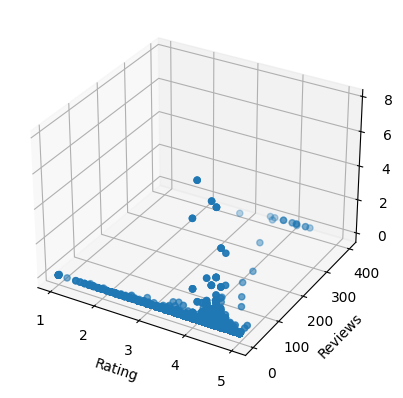

In [341]:
# from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(google['Rating'], google['Price'], google['Reviews'])
ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Price')
plt.show()


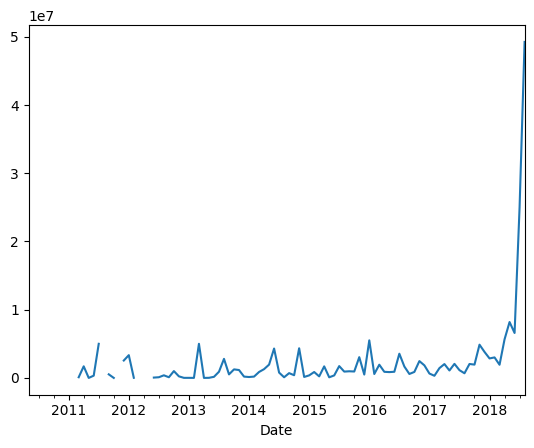

In [342]:
google['Date'] = google['Last Updated']
google.set_index('Date', inplace=True)
google['Installs'].resample('M').mean().plot()
plt.show()

In [343]:
# plt.figure(figsize=(18, 10))
# sns.scatterplot(data=google, x="Rating", y="Reviews", size="Installs", hue="Category", legend=True, sizes=(50, 200))
# plt.show()


To improve the accessibility of scatter plot between Reviews and Rating 
I've constructed a interactive version using plotly

In [344]:
import plotly.express as px

fig = px.scatter(google, x="Rating", y="Reviews", color="Category", size="Installs", hover_name="App", size_max=60, log_y=True)
fig.update_layout(title='Interactive Scatter Plot of Apps by Rating, Reviews, and Installs')
fig.show()


Above graph shows a gentle positive trend between Reivews and Rating, onced zoomed in it can be confirmed once again that apps with more installs generally have more reviews.
Interestingly apps with the highest and lowest rating generally have fewer installs perhaps it's due to small sample size.

Visualisations for google.user

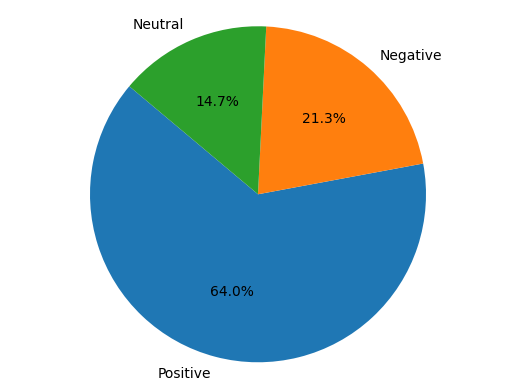

In [345]:
sentiment_counts = google_user["Sentiment"].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%.1f%%', startangle=140)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Majority of the reviews are positive which matches the finding from the histogram of the google DataFrame

In [346]:
google_user.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
44333,Farm Heroes Saga,The latest update made game really unplayable ...,Negative,-0.032727,0.490909
41313,ExDialer - Dialer & Contacts,After looking simple useful dialer without ads...,Positive,0.128571,0.493878
23221,"Candy Camera - selfie, beauty camera, photo ed...",Please Fix The Focus Problem,Neutral,0.000000,0.000000
30572,Credit Sesame,While I super impressed start. I realized appl...,Positive,0.545833,0.704167
47787,FollowMyHealth®,I absolutly love app. I 27 weeks pregnant some...,Positive,0.253333,0.506667
451,21-Day Meditation Experience,Cool,Positive,0.350000,0.650000
27008,Clash of Clans,Even though new player find game dynamic chall...,Positive,0.173636,0.517121
46807,Flickr,"Flickr social media, artistic outlet, exhibiti...",Positive,0.179630,0.296296
14642,Bible,"become ""go-to"" every morning...",Neutral,0.000000,0.000000
60891,Helix Jump,I liked lot I paid remove ads surprise! You ca...,Positive,0.187500,0.514286


It'll be a good idea to represent the text data from Translated_Review visually.
This can be particularly useful for quickly identifying the overall sentiment of large volume of
text.

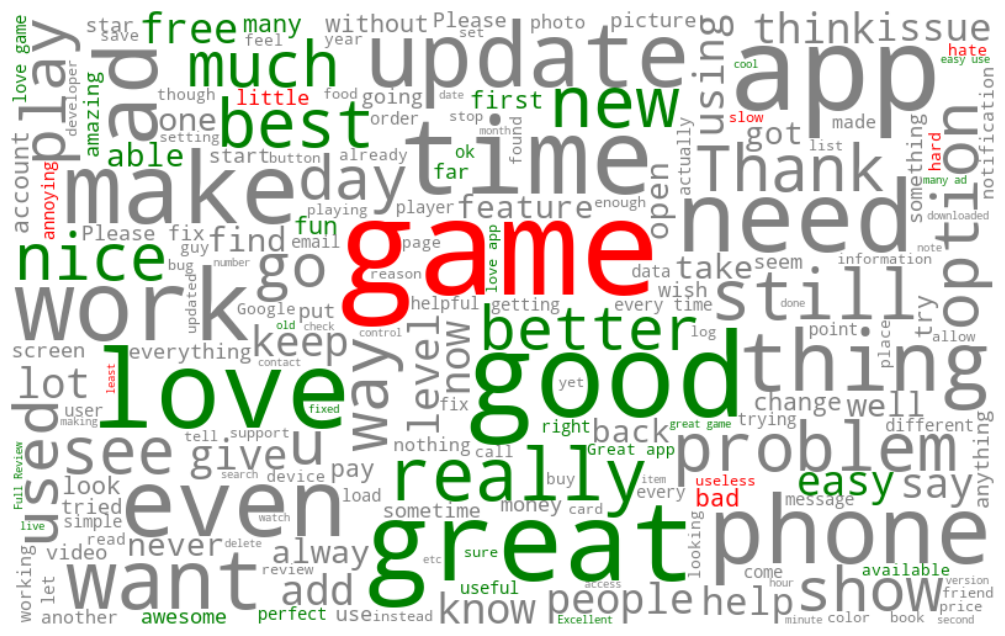

In [347]:
from wordcloud import WordCloud
from textblob import TextBlob

# collect all the words from reviews
all_words = ' '.join([text for text in google_user['Translated_Review']])

def color_func(word, *args, **kwargs):
    sentiment = TextBlob(word).sentiment.polarity
    if sentiment > 0:
        return "green"  # Positive sentiment
    elif sentiment < 0:
        return "red"    # Negative sentiment
    else:
        return "grey"   # Neutral sentiment

# call WordCloud object to creat a word cloud from all_words    
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", color_func=color_func).generate(all_words)

plt.figure(figsize=(15, 8))
# imshow to display word cloud with interpolation="bilinear" to smooth out the image
plt.imshow(wordcloud, interpolation="bilinear")
# remove remove all labels and ticks from the plot 
plt.axis('off')
plt.show()



Combinining two DF together

In [348]:
combined_google = pd.merge(google, google_user, on='App')
combined_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40414 entries, 0 to 40413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     40414 non-null  object        
 1   Category                40414 non-null  object        
 2   Rating                  40414 non-null  float64       
 3   Reviews                 40414 non-null  int32         
 4   Size                    40414 non-null  object        
 5   Installs                40414 non-null  int32         
 6   Type                    40414 non-null  object        
 7   Price                   40414 non-null  float64       
 8   Content Rating          40414 non-null  object        
 9   Genres                  40414 non-null  object        
 10  Last Updated            40414 non-null  datetime64[ns]
 11  Current Ver             40414 non-null  object        
 12  Android Ver             40414 non-null  object

We'll use heatmap again with correlation matrix for a quick glance at potential relationships.

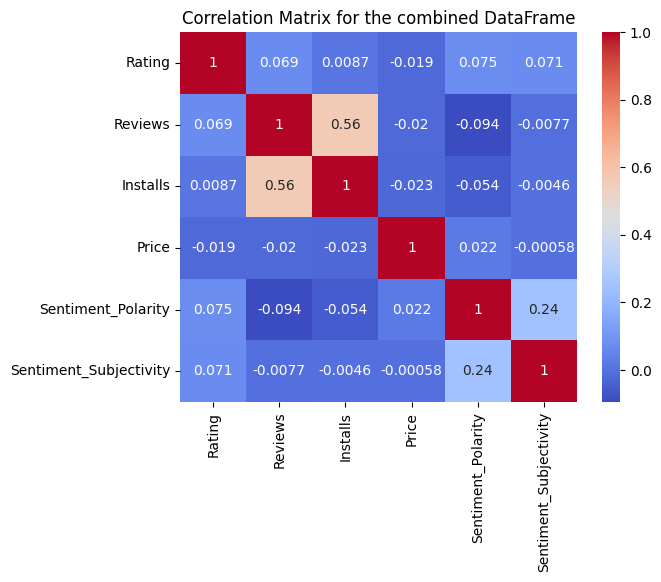

In [349]:
sns.heatmap(combined_google.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for the combined DataFrame")
plt.show()

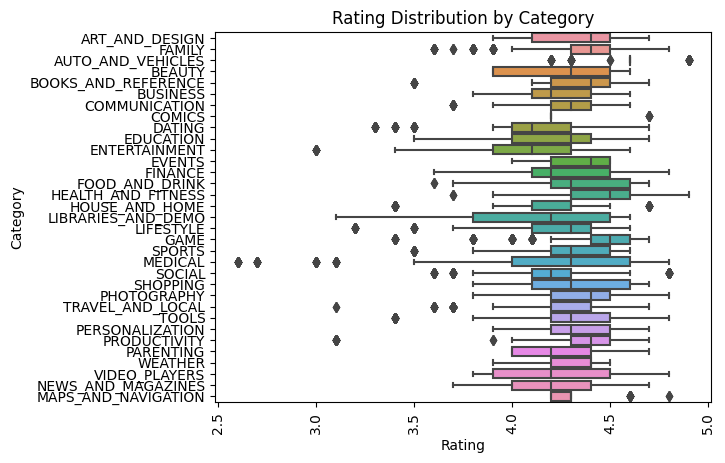

In [350]:
sns.boxplot(y='Category', x='Rating', data=combined_google)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Category')
plt.show()

In [351]:
combined_google.groupby("App").head().sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
12700,HTC Speak,LIFESTYLE,3.5,6145,13M,10000000,Free,0.0,Everyone,Lifestyle,2016-06-30,8.00.775375,5.0 and up,Htc m9 Quick fix thanks. That update bug (The ...,Positive,0.058333,0.291667
11359,Happify,HEALTH_AND_FITNESS,3.7,1812,37M,100000,Free,0.0,Everyone,Health & Fitness,2018-07-24,1.31.0-15160.950adac99,4.4 and up,Useful helping flourish better,Positive,0.400000,0.250000
3250,"GO SMS Pro - Messenger, Free Themes, Emoji",COMMUNICATION,4.4,2876500,24M,100000000,Free,0.0,Everyone,Communication,2018-08-01,7.73,4.0 and up,"The good, then, sudden, today, telling I pay a...",Positive,0.066667,0.700000
6661,Acorn TV: World-class TV from Britain and Beyond,ENTERTAINMENT,3.0,493,23M,50000,Free,0.0,Everyone,Entertainment,2018-06-15,2.0.0,4.4 and up,This update terrible! Loss function Chromecast...,Negative,-0.044444,0.502778
36672,File Explorer,PRODUCTIVITY,4.1,979,720k,100000,Free,0.0,Everyone,Productivity,2013-09-30,2.1.3,2.2 and up,Really well programed Its size small slow mobi...,Negative,-0.037500,0.300000


In [352]:
# convert "Sentiment" to category type
combined_google["Sentiment"].astype("category")
# add a column to represent "Sentiment" in int
combined_google["Sentiment Num"] = combined_google["Sentiment"].replace(to_replace=["Neutral", "Positive", "Negative"], value=[0, 1, -1])
# average Sentiment per App
combined_google["Avg Sen/App"] = combined_google.groupby("App")["Sentiment Num"].transform("mean")
# average Sentiment per Category
combined_google["Avg Sen/Category"] = combined_google.groupby("Category")["Sentiment Num"].transform("mean")
combined_google.sample(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment Num,Avg Sen/App,Avg Sen/Category
31118,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7,1830388,Varies with device,100000000,Free,0.0,Everyone,Travel & Local,2018-08-06,Varies with device,Varies with device,I booked room pay hotel taken deposit already ...,Neutral,0.000000,0.000000,0,0.243902,0.406799
19091,Bowmasters,GAME,4.7,1535084,Varies with device,50000000,Free,0.0,Teen,Action,2018-07-23,2.12.5,4.1 and up,Offers chests watch ads. You watch game crashe...,Negative,-0.150000,0.200000,-1,0.175258,0.205423
3734,"Hily: Dating, Chat, Match, Meet & Hook up",DATING,4.1,2560,56M,100000,Free,0.0,Mature 17+,Dating,2018-08-01,2.5.2,4.1 and up,I accidentally logged I requested link reset I...,Neutral,0.000000,0.000000,0,0.263158,0.386685
12798,H&M,LIFESTYLE,3.7,41917,14M,10000000,Free,0.0,Everyone,Lifestyle,2018-07-30,9.6.3,4.4 and up,The new awful. I logged back account favorites...,Negative,-0.123106,0.409091,-1,0.108108,0.467588
11406,Brain Waves - Binaural Beats,HEALTH_AND_FITNESS,4.4,5038,10M,500000,Free,0.0,Everyone,Health & Fitness,2018-07-15,5.2,4.4 and up,"Managed get beta gamma state, Theta coordinate...",Neutral,0.000000,0.000000,0,0.675000,0.657309


Text(0.5, 1.0, 'Average Sentiment per Category')

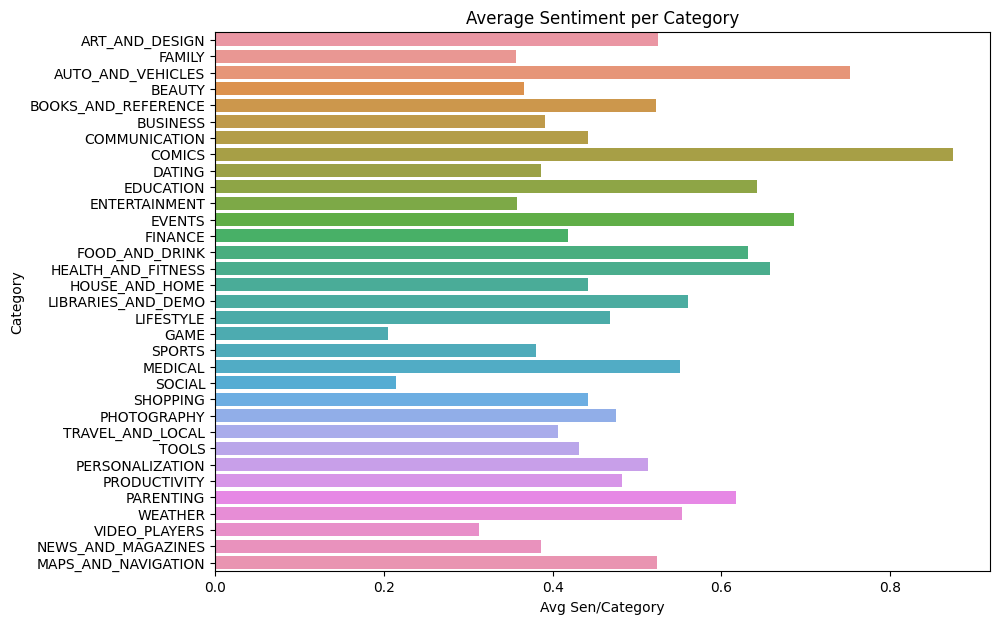

In [353]:
plt.figure(figsize=(10,7))
sns.barplot(x=combined_google["Avg Sen/Category"], y=combined_google["Category"])
plt.title("Average Sentiment per Category")

Text(0.5, 1.0, 'Best App Based on Sentiment For Each Category')

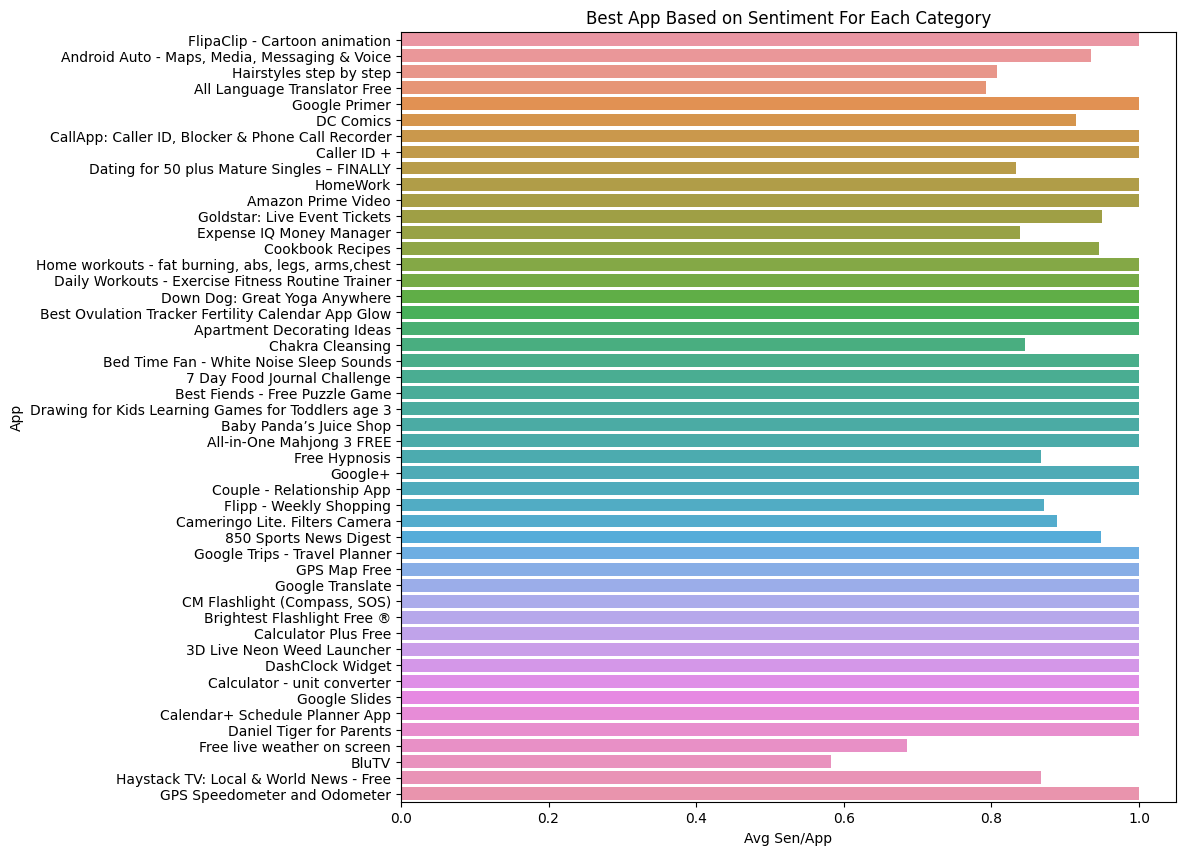

In [354]:
# Calculate the maximum "Avg Sen/App" value for each category
max_values = combined_google.groupby("Category")["Avg Sen/App"].transform("max")

# Filter the DataFrame to only include rows where "Avg Sen/App" equals the category's max value
best_performance_per_category = combined_google[combined_google["Avg Sen/App"] == max_values]

plt.figure(figsize=(10,10))
sns.barplot(x="Avg Sen/App", y="App", data=best_performance_per_category)
plt.title("Best App Based on Sentiment For Each Category")

Text(0.5, 1.0, 'Worst App Based on Sentiment For Each Category')

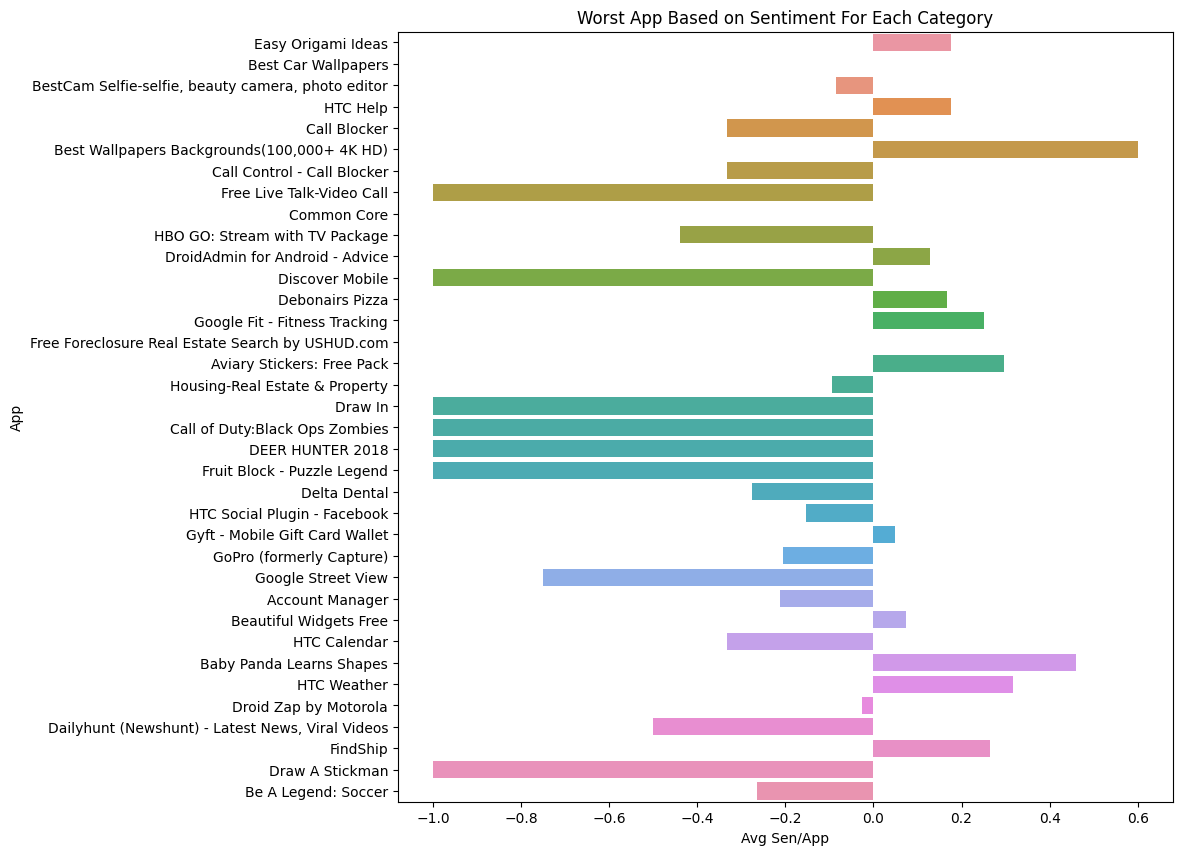

In [355]:
min_values = combined_google.groupby("Category")["Avg Sen/App"].transform("min")

worst_performance_per_category = combined_google[combined_google["Avg Sen/App"] == min_values]

plt.figure(figsize=(10,10))
sns.barplot(x="Avg Sen/App", y="App", data=worst_performance_per_category)
plt.title("Worst App Based on Sentiment For Each Category")

In [356]:
combined_google.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment Num,Avg Sen/App,Avg Sen/Category
19175,Bowmasters,GAME,4.7,1535973,Varies with device,50000000,Free,0.0,Teen,Action,2018-07-23,2.12.5,4.1 and up,TO MANY ADS!!!!! THIS GAME HAS TO MANY ADS EVE...,Positive,0.096429,0.564286,1,0.175258,0.205423
9501,Caviar - Food Delivery,FOOD_AND_DRINK,4.2,3755,8.5M,100000,Free,0.0,Everyone,Food & Drink,2018-07-20,2.4.11,6.0 and up,Great easy benefits great,Positive,0.677778,0.777778,1,0.435897,0.631420
17295,Fishdom,GAME,4.6,2157930,Varies with device,10000000,Free,0.0,Everyone,Puzzle,2018-07-19,2.21.5,4.0.3 and up,"I stuck level upside pyramid gold squares, thr...",Positive,0.321484,0.437500,1,0.253333,0.205423
38966,A+ Mobile,FINANCE,3.9,730,6.3M,10000,Free,0.0,Everyone,Finance,2018-06-26,5.4.4,4.4 and up,It tells I need update option update. So I uni...,Positive,0.156250,0.606250,1,0.571429,0.418722
11410,Brain Waves - Binaural Beats,HEALTH_AND_FITNESS,4.4,5038,10M,500000,Free,0.0,Everyone,Health & Fitness,2018-07-15,5.2,4.4 and up,It great mind focus !,Positive,1.000000,0.750000,1,0.675000,0.657309


<Axes: xlabel='Price', ylabel='Avg Sen/App'>

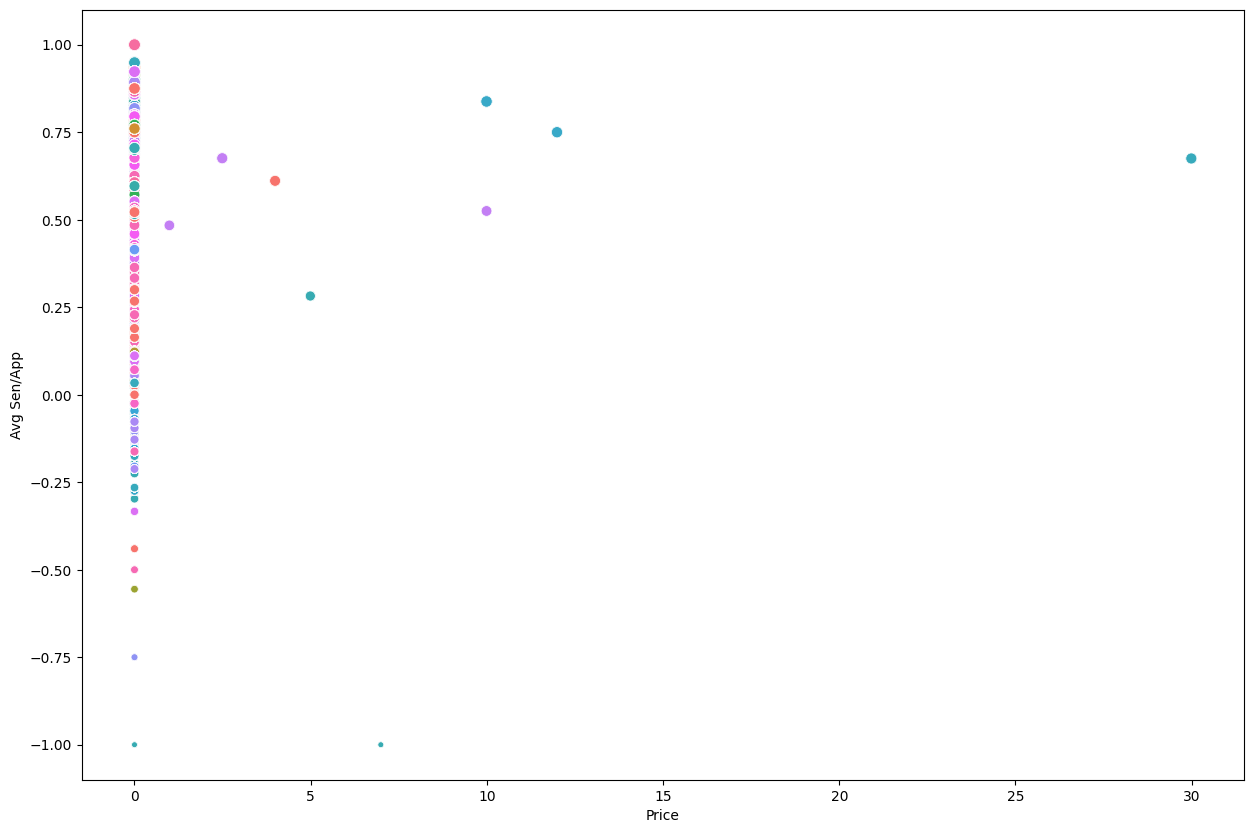

In [357]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=combined_google, x="Price", y="Avg Sen/App", size="Avg Sen/App", hue="Category", legend=False)
# plt.yscale("log")
# plt.xscale("log")